# GAUSSSIAN NAIVE BAYES CLASSIFICATION FOR PREDICTION ON RICE (OSMANCIK AND CAMMEO)

Beras merupakan salah satu sumber karbohidrat utama bagi sebagian besar populasi di dunia, termasuk di Indonesia. Dalam beberapa tahun terakhir, permintaan akan beras jenis tertentu yang memiliki kualitas dan karakteristik yang unggul semakin meningkat. Dua jenis beras yang sedang populer dan diminati adalah beras Osmancik dan beras Cameo.

Beras Osmancik berasal dari Turki dan dikenal memiliki biji yang panjang, aroma yang harum, serta kualitas yang sangat baik. Beras ini memiliki daya serap air yang rendah sehingga hasil masaknya lebih pulen dan tidak lengket. Karena kualitasnya yang baik, beras Osmancik sering digunakan untuk sajian khusus dan dianggap sebagai beras premium.

Beras Cameo juga merupakan beras berkualitas tinggi yang berasal dari Italia. Beras ini memiliki biji yang panjang dan ramping dengan warna putih bersih. Karakteristiknya yang unggul antara lain tekstur yang lembut, rasa yang enak, serta mudah diolah menjadi berbagai hidangan. Beras Cameo sering digunakan untuk membuat risotto, hidangan khas Italia yang terkenal.

## TUJUAN

Percobaan klasifikasi beras Osmancik dan Cameo bertujuan untuk mengidentifikasi dan membedakan antara kedua jenis beras ini berdasarkan karakteristik fisiknya. Metode klasifikasi yang umum digunakan adalah analisis citra digital menggunakan teknik pengolahan citra dan pembelajaran mesin. Dengan melakukan percobaan ini, diharapkan dapat membantu dalam pengembangan sistem identifikasi beras yang cepat, akurat, dan otomatis. dianggap sebagai beras premium.

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier #

# DATA UNDERSTANDING 

Data Understanding atau memahami data adalah sebuah tahapan di dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan yang diberikan. Pada case kali ini kita akan memahami Dataset Rice (Cammeo and Osmancik).

## MENGUMPULKAN DATA

### Mencari Data

Tahapan pertama pada mengumpulkan data adalah dengan mencari dataset yang akan kita gunakan, sesuai penjelasan di atas kita akan menggunakan Dataset Rice (Cammeo and Osmancik) yang bersumber dari:

https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

### Menarik Data

Setelah kita mendapatkan data yang sesuai, selanjutnya kita upload data tersebut ke drive atau database yang kita miliki. Kemudian kami integrasikan dataset tersebut ke notebooks yang kami gunakan dengan tujuan akan memudahkan akses sesama anggota kelompok.

In [2]:
df = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')

df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


Data di atas merupakan data yang akan kami gunakan selama pengerjaan kali ini.

## MEMAHAMI DATA

### Deskripsi Data

<img src="asset/dataUnderstanding/beras.jpg" width="" align="" />

Rice atau dalam Bahasa Indonesia Beras, merupakan bagian bulir padi (gabah) yang telah dipisah dari sekam. Sekam (Jawa mêrang) secara anatomi disebut 'palea' (bagian yang ditutupi) dan 'lemma' (bagian yang menutupi). Pada salah satu tahap pemrosesan hasil panen padi, gabah ditumbuk dengan lesung (Jawa lumpang) atau digiling sehingga bagian luarnya (kulit gabah) terlepas dari isinya. Bagian isi inilah, yang berwarna putih, kemerahan, ungu, atau bahkan hitam, yang disebut beras.

Anatomi beras

<img src="asset/dataUnderstanding/anatomi beras.png" width="50%" align="" />

Beras sendiri secara biologi adalah bagian biji padi yang terdiri dari

- Aleuron, lapis terluar yang sering kali ikut terbuang dalam proses pemisahan kulit

- Endosperma, tempat sebagian besar pati dan protein beras berada

- Embrio, yang merupakan calon tanaman baru (dalam beras tidak dapat tumbuh lagi, kecuali dengan bantuan teknik kultur jaringan). Dalam bahasa sehari-hari, embrio disebut sebagai mata beras.

Di antara padi bersertifikat yang ditanam di TURKI, spesies Osmancik, yang memiliki areal tanam luas sejak tahun 1997 dan spesies Cammeo yang ditanam sejak tahun 2014. Oleh karena itu, pada pengerjaan kami kali ini hanya menggunakan 2 species saja.

<img src="asset/dataUnderstanding/Gambar Data.png" width="50%" align="" />

Pada dataset yang kita miliki terdapat 3810 data numerik, 2180 di antaranya milik Osmancik dan 1630 milik Cammeo.

### Penjelasan Fitur

Sebanyak 3.810 gambar butiran beras diambil untuk kedua spesies tersebut, diproses dan dibuat kesimpulan fitur. Diperoleh 7 ciri morfologi untuk setiap butir beras.

- Area (Integer, px, numerik)merupakan batas butir beras, fitur ini mengembalikan jumlah piksel dalam batas butir tiap berasnya.

- Perimeter(float, px, numerik) merupakan fitur yang menampung keliling butiran beras yang di dapat dengan menghitung jarak antar piksel di sekitar batas butiran beras.

- Major Axis Length(float, numerik) panjang sumbu utama merupakan garis terpanjang yang dapat digambar pada butiran beras, yaitu jarak sumbu utama.

- Minor Axis Length(float, numerik) panjang sumbu kecil merupakan garis terpendek yang dapat digambar pada butiran beras, yaitu jarak sumbu kecil.

- Eccentricity(float, numerik) mengukur seberapa bulat elips, yang mempunyai momen yang sama dengan butiran beras.

- Convex Area(float, numerik) mengembalikan jumlah piksel cangkang cembung terkecil di wilayah yang dibentuk oleh butiran beras.

- Extent(float, numerik ) mengembalikan rasio wilayah yang dibentuk oleh butiran beras terhadap piksel kotak pembatas

## PLOTTING DATA

### Data Distribution

- Area Feature

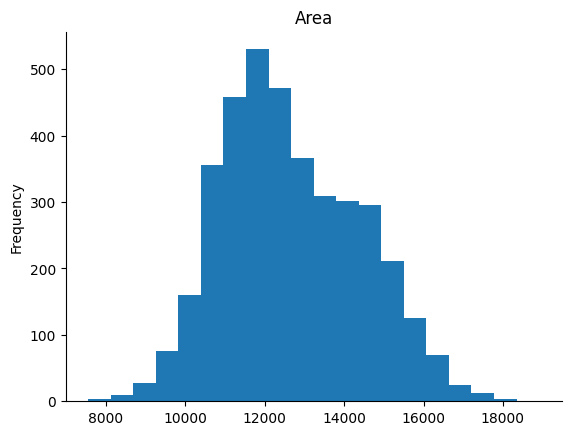

In [3]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Perimeter Feature

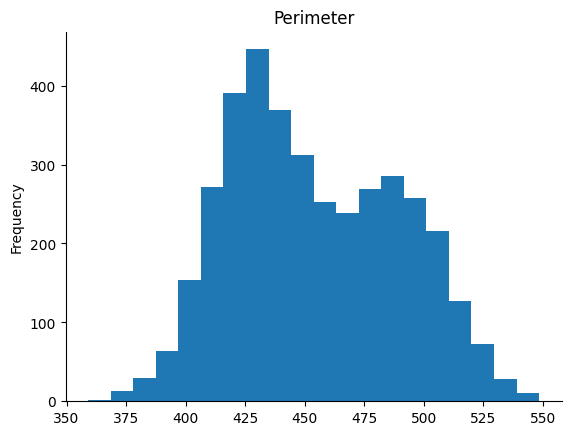

In [4]:
df['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Major_Axis_Length Feature

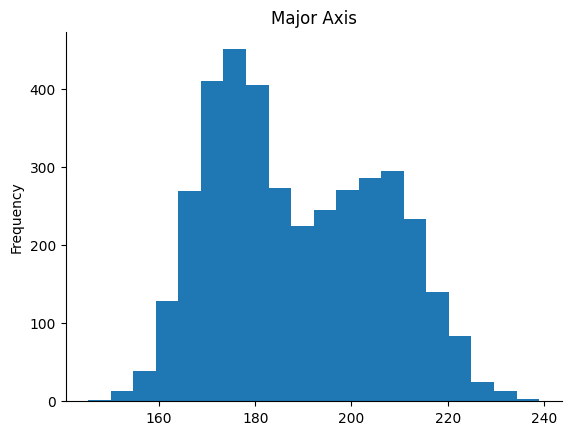

In [5]:
df['Major_Axis_Length'].plot(kind='hist', bins=20, title='Major Axis')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Minor_Axis_Length Feature

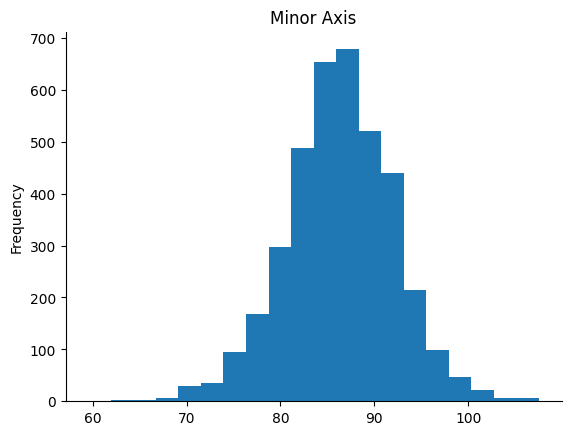

In [6]:
df['Minor_Axis_Length'].plot(kind='hist', bins=20, title='Minor Axis')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Eccentricity Feature

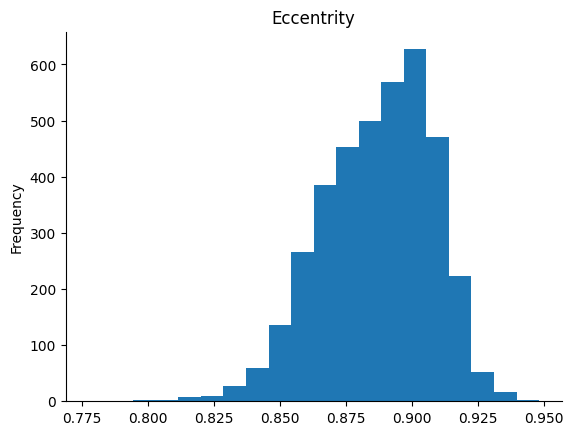

In [7]:
df['Eccentricity'].plot(kind='hist', bins=20, title='Eccentrity')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Convex Area Feature 

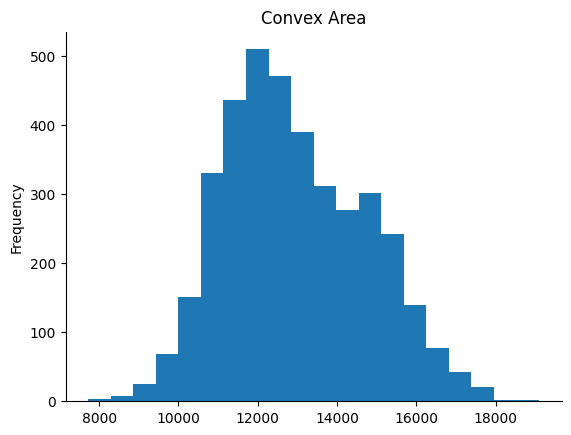

In [8]:
df['Convex_Area'].plot(kind='hist', bins=20, title='Convex Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Extent Feature

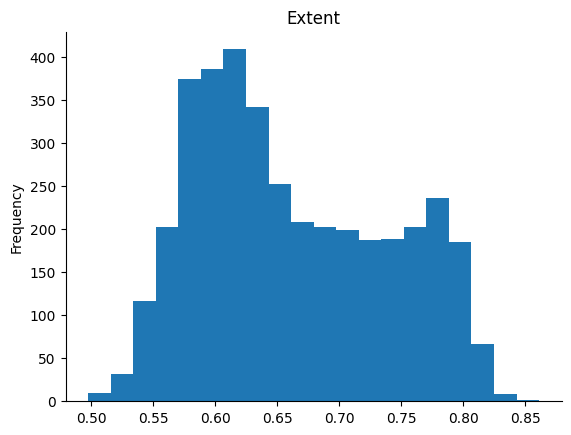

In [9]:
df['Extent'].plot(kind='hist', bins=20, title='Extent')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2D Distribution

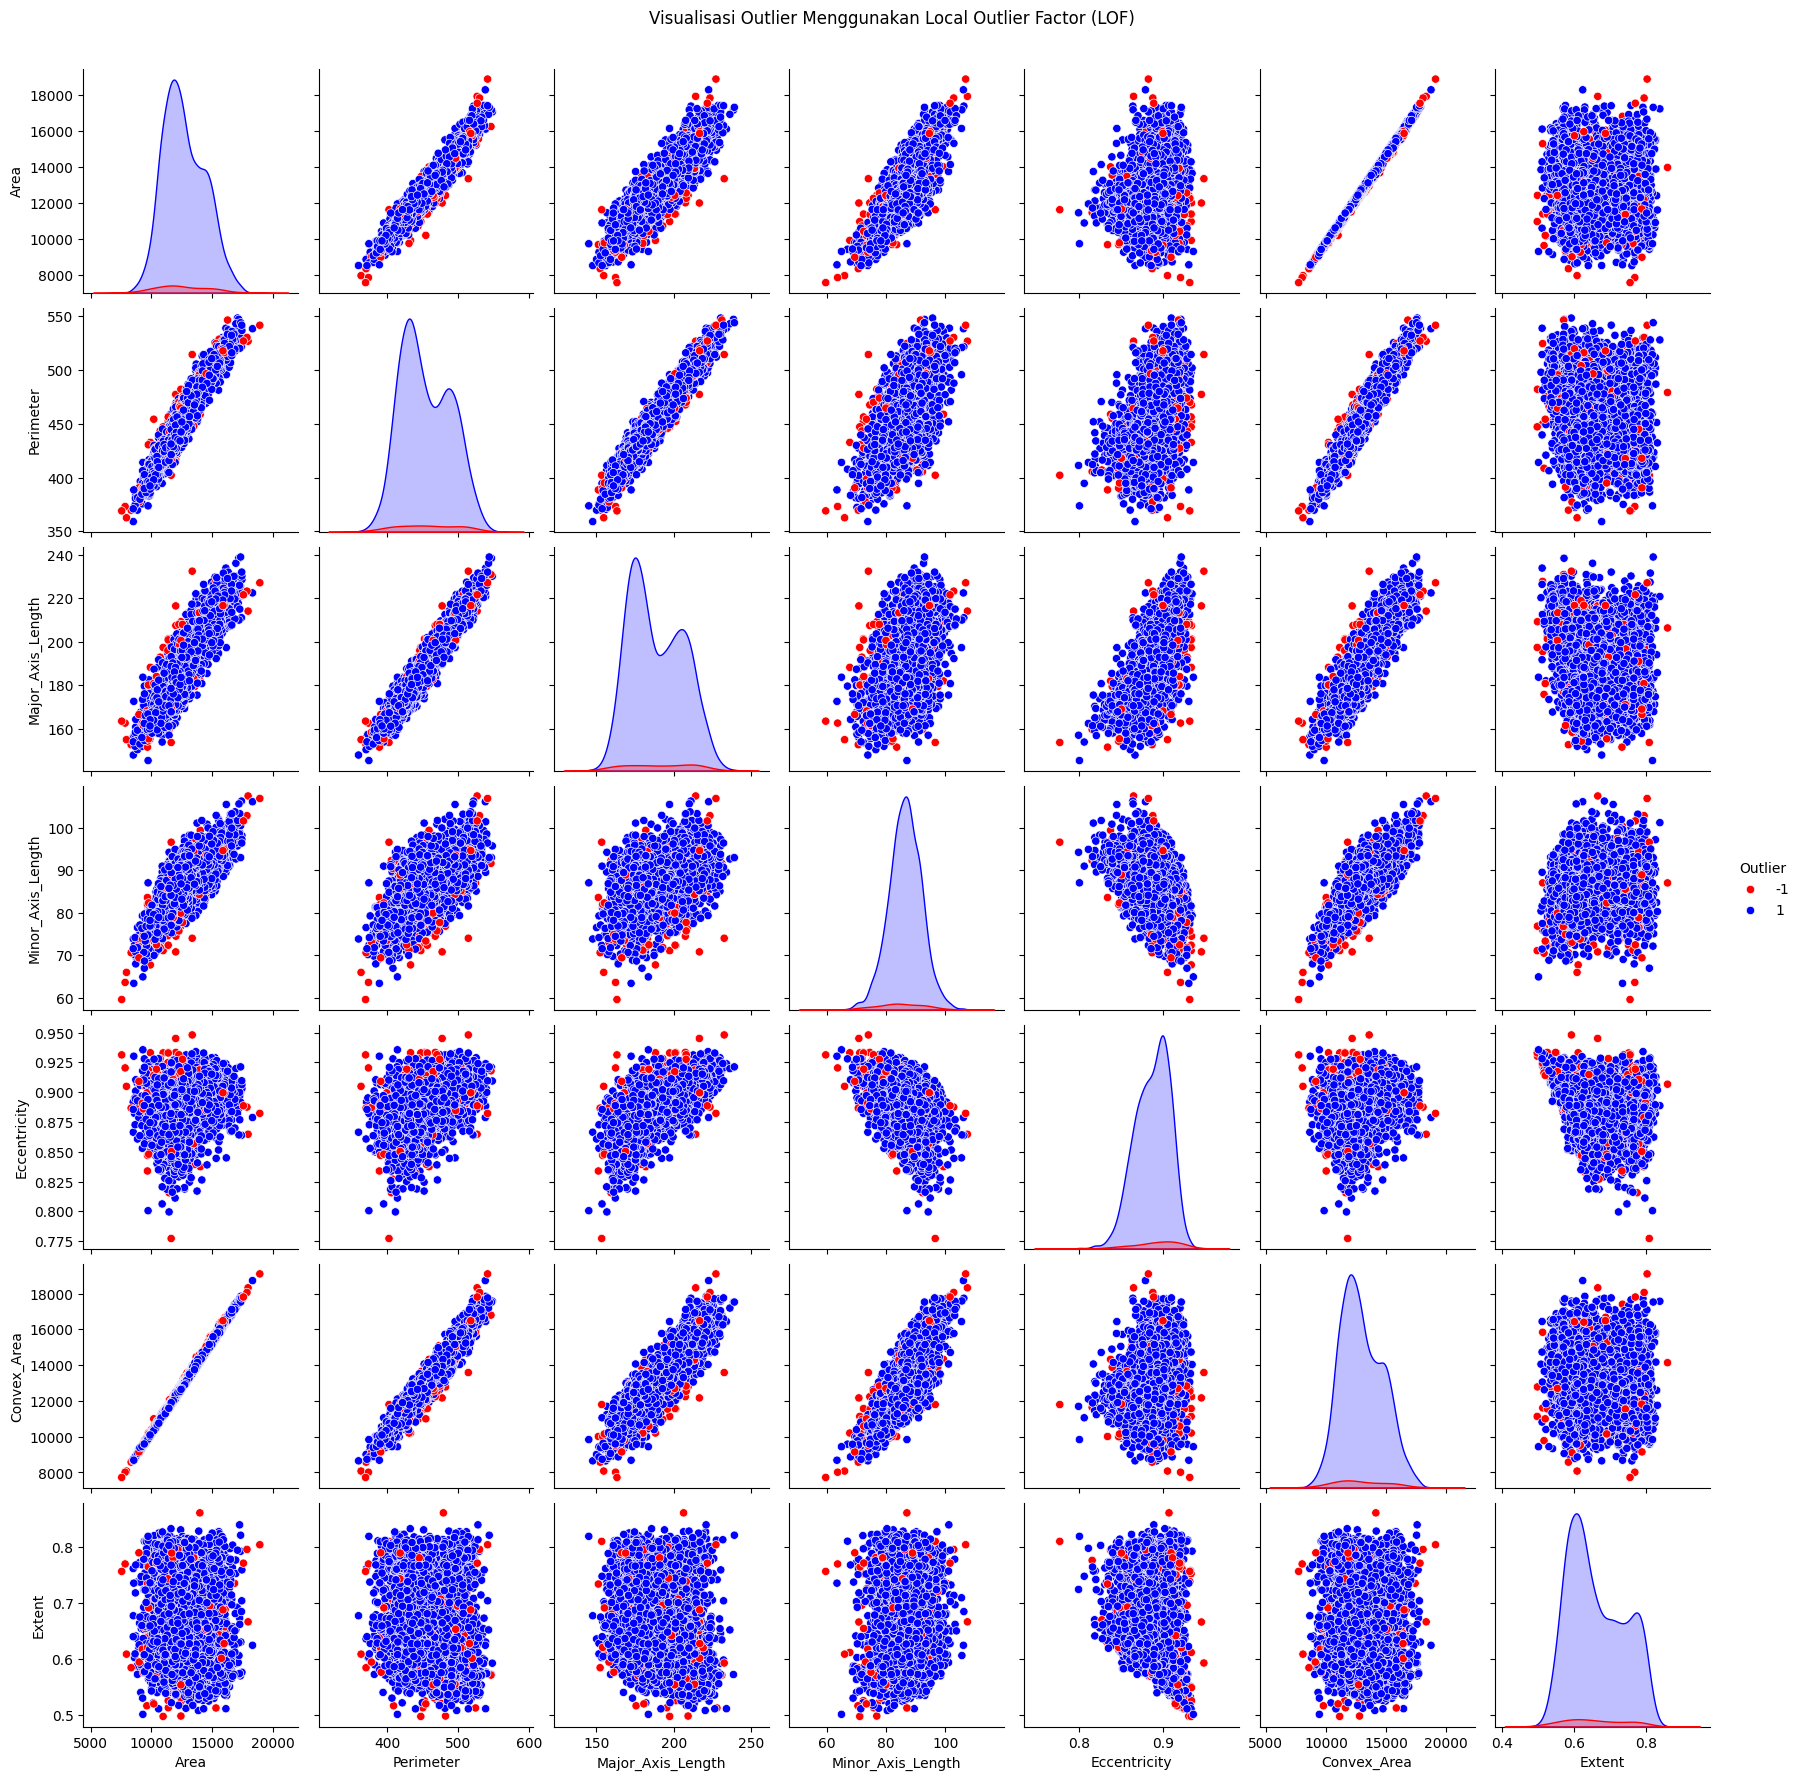

In [10]:
# Asumsi df af_outliersalah DataFrame Anda dengan kolom-kolom yang relevan
# Mengonversi kolom yang dipilih menjadi array numpy
X = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']].values

# Menerapkan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(X)

# Menambahkan prediksi outlier ke DataFrame
df['Outlier'] = y_pred

# Menampilkan plot pasangan (pair plot)
pair_plot = sns.pairplot(df, hue='Outlier', palette={1: 'blue', -1: 'red'}, diag_kind='auto')

# Menambahkan judul
pair_plot.fig.suptitle('Visualisasi Outlier Menggunakan Local Outlier Factor (LOF)', y=1.02)

# Menampilkan plot
plt.show()

## EKSPLORASI DATA

In [11]:
df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


## KUALITAS DATA

### Missing Value

Missing value adalah informasi yang tidak tersedia untuk sebuah objek (kasus). Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada

Kita akan mengecek untuk kualitas data, apakah data tersebut memiliki missing value atau tidak. 

In [12]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
Outlier              0
dtype: int64

Pada data set yang kita gunakan kali ini, data tidak terdapat missing value.

### Outlier Data

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Nilai ini muncul sebagai pengecualian dalam pola data yang ada.

Nilai yang ada di outlier bisa jauh lebih tinggi maupun lebih rendah dibandingkan dengan nilai-nilai lain dalam dataset. Outlier bisa terjadi karena berbagai alasan, termasuk kesalahan pengukuran, kejadian langka, atau karena faktor lain yang tidak terduga.

Mendeteksi outlier merupakan langkah penting dalam analisis data karena outlier memiliki dampak signifikan terhadap hasil analisis dan berpotensi menghasilkan kesimpulan yang tidak akurat.

Berikut beberapa alasan lain di balik pentingnya mendeteksi outlier:

1. Menghindari distorsi analisis

2. Memahami data dengan tepat

3. Memastikan analisis valid

4. Mendeteksi jika ada kesalahan atau kecurangan

Oleh karena itu, nantinya akan kita cek apakah ada data yang aneh atau tidak dengan menggunakan LOF (Local Outlier Factor)

# DATA PREPROCESSING

### Local Outlier Factor

Konsep Local Outlier Factor

Local Outlier Factor (LOF) adalah metode yang digunakan dalam analisis data untuk mengidentifikasi observasi yang dianggap sebagai outlier berdasarkan konteks lokal atau lingkungan mereka. 
LOF memberikan skor untuk setiap data berdasarkan seberapa "aneh" atau tidak biasa data tersebut dibandingkan dengan tetangga-tetangganya.

Berikut adalah konsep utama dari LOF:

- Local Reachability Density (LRD):
Local Reachability Density (LRD) adalah ukuran kepadatan lokal dari sebuah data. Ini menunjukkan seberapa dekat sebuah data dengan tetangganya dalam ruang fitur. LRD didefinisikan sebagai kebalikan dari jarak rata-rata antara sebuah data dan tetangganya dalam k-NN. Semakin kecil jarak rata-rata, semakin besar LRD.

- Local Outlier Factor (LOF):
Local Outlier Factor (LOF) adalah rasio dari LRD sebuah data terhadap LRD dari tetangga-tetangganya. Ini mengukur seberapa jauh sebuah data dari tetangganya dalam hal kepadatan. Data dengan LOF yang tinggi cenderung menjadi outlier karena mereka memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga-tetangganya.

Proses utama dalam menghitung LOF melibatkan langkah-langkah berikut:

- Hitung jarak antara semua pasang data dalam ruang fitur dengan Euclidean Distance.


<img src="image-20240530-065904.png" width="actual" align="left" />

- 
Temukan k tetangga terdekat untuk setiap data.

- Menghitung Reachability Distance (RD)

<img src="image-20240530-070120.png" width="50%" align="left" />

- 
Hitung LRD untuk setiap data dengan menghitung kebalikan dari jarak rata-rata antara data dan tetangganya.

<img src="image-20240530-070226.png" width="50%" align="left" />

- 
Hitung LOF untuk setiap data dengan membandingkan LRD dari data dengan LRD dari tetangga-tetangganya.

<img src="image-20240530-070247.png" width="50%" align="left" />

### Check Outliers

In [13]:
lof = LocalOutlierFactor(n_neighbors=5, p=2)

lof_predict = lof.fit_predict(df.drop(['Class'], axis=1))

outlier = df.index[lof_predict == -1]

print("Index predicted table:", df.index[lof_predict == -1])

Index predicted table: Index([   4,   41,   56,   74,   85,  152,  157,  181,  198,  223,  225,  277,
        331,  340,  376,  399,  413,  423,  425,  518,  573,  600,  648,  656,
        772,  795,  856,  869,  881,  900,  928,  957, 1027, 1073, 1146, 1164,
       1166, 1178, 1203, 1217, 1271, 1296, 1312, 1325, 1354, 1369, 1428, 1460,
       1541, 1573, 1622, 1625, 1634, 1668, 1730, 1741, 1750, 1810, 2009, 2032,
       2055, 2097, 2102, 2282, 2290, 2334, 2349, 2358, 2436, 2563, 2567, 2718,
       2745, 2770, 3025, 3077, 3169, 3263, 3279, 3294, 3333, 3353, 3373, 3376,
       3398, 3416, 3491, 3569, 3572, 3587, 3631, 3643, 3654, 3696, 3711],
      dtype='int64')


In [14]:
df.loc[outlier].drop(['Outlier'], axis=1)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
41,13047,486.368988,213.194473,79.288872,0.928269,13621,0.615425,Cammeo
56,12950,468.570007,196.616791,84.800316,0.902210,13584,0.761810,Cammeo
74,15319,506.024994,208.227753,94.838745,0.890258,15813,0.573702,Cammeo
85,13302,482.690002,209.397110,81.748909,0.920645,13827,0.595328,Cammeo
...,...,...,...,...,...,...,...,...
3631,9679,390.221985,154.200592,81.986458,0.846941,10003,0.620687,Osmancik
3643,13576,477.825012,190.026352,91.821098,0.875509,14137,0.683275,Osmancik
3654,9330,391.165985,161.425415,74.863876,0.885957,9624,0.576353,Osmancik
3696,9772,394.983002,155.292648,82.316940,0.847950,10154,0.691285,Osmancik


In [15]:
df.drop(columns=['Outlier'], inplace=True)

df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


mengganti outlier dengan mean

In [16]:
for column in df.drop(['Class'], axis=1).columns:
    column_mean = df[column].mean()
    
    if df[column].dtype == 'int64':
        column_mean = int(column_mean)
    
    df.loc[outlier, column] = column_mean

In [17]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,12667,454.239180,188.776222,86.313750,0.886871,12952,0.661934,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


# DATA MODELING

Membagi data (feature dan class)

Pada klasifikasi naive bayes gaussian kita memerlukan data train dan data test. Data train merupakan bagian dalam kumpulan dataset yang disediakan untuk menjadi bahan pembelajaran model agar model dapat menggeneralisasi (menemukan pola) data sehingga nantinya dapat digunakan untuk memprediksi data baru. Sedangkan data test adalah bagian dari kumpulan data set yang akan digunakan untuk mengetest dengan acuan prediksi dari data train yang digunakan. Untuk pembagian data nya sendiri adalah 20% menjadi data Test dan 80% menjadi data Train. Pada kode berikut random state dimulai dari 20.

In [18]:
x = df.drop(['Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Menampilkan x_train data

In [19]:
x_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
3644,12529,437.838989,174.861450,92.189262,0.849733,12840,0.766019
3418,11051,424.976013,180.871902,78.267380,0.901527,11240,0.568058
1351,12975,463.851013,196.423965,85.064117,0.901363,13358,0.609126
3591,10398,405.678986,162.227158,82.393456,0.861422,10658,0.644717
246,14541,492.785004,204.257141,92.471016,0.891653,14893,0.758292
...,...,...,...,...,...,...,...
1130,16625,535.989014,229.793594,93.089622,0.914272,16951,0.654141
1294,13901,478.848999,200.441910,89.341988,0.895170,14232,0.568548
860,16291,523.192993,223.252335,93.604156,0.907859,16595,0.581157
3507,10847,417.924011,170.366791,82.473007,0.875018,11107,0.746319


Menampilkan x_test data

In [20]:
x_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
1011,12442,459.535004,187.508850,87.187302,0.885323,12941,0.587580
3185,12408,437.014008,179.741165,88.829605,0.869343,12598,0.636928
3698,12867,449.079987,181.700562,91.341064,0.864460,13152,0.649062
897,13090,472.945007,202.601578,83.230179,0.911722,13331,0.775290
3245,10359,409.510986,173.337967,76.875809,0.896273,10510,0.573588
...,...,...,...,...,...,...,...
1366,14802,497.832001,209.617950,91.147133,0.900515,15208,0.622980
644,17192,528.341980,222.949936,99.092674,0.895798,17457,0.628914
2634,11234,425.931000,176.301987,82.101532,0.884950,11452,0.655579
1171,13982,479.785004,204.542389,88.279648,0.902067,14221,0.772913


Menampilkan y_train data

In [21]:
y_train

3644    Osmancik
3418    Osmancik
1351      Cammeo
3591    Osmancik
246       Cammeo
          ...   
1130      Cammeo
1294      Cammeo
860       Cammeo
3507    Osmancik
3174    Osmancik
Name: Class, Length: 3048, dtype: object

Menampilkan y_test data

In [22]:
y_test

1011      Cammeo
3185    Osmancik
3698    Osmancik
897       Cammeo
3245    Osmancik
          ...   
1366      Cammeo
644       Cammeo
2634    Osmancik
1171      Cammeo
1569      Cammeo
Name: Class, Length: 762, dtype: object

Menggabungkan data x dan y

In [23]:
df_train = pd.concat([x_train, y_train], axis=1, join='inner')
df_test = pd.concat([x_test, y_test], axis=1, join='inner')

df_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1011,12442,459.535004,187.508850,87.187302,0.885323,12941,0.587580,Cammeo
3185,12408,437.014008,179.741165,88.829605,0.869343,12598,0.636928,Osmancik
3698,12867,449.079987,181.700562,91.341064,0.864460,13152,0.649062,Osmancik
897,13090,472.945007,202.601578,83.230179,0.911722,13331,0.775290,Cammeo
3245,10359,409.510986,173.337967,76.875809,0.896273,10510,0.573588,Osmancik
...,...,...,...,...,...,...,...,...
1366,14802,497.832001,209.617950,91.147133,0.900515,15208,0.622980,Cammeo
644,17192,528.341980,222.949936,99.092674,0.895798,17457,0.628914,Cammeo
2634,11234,425.931000,176.301987,82.101532,0.884950,11452,0.655579,Osmancik
1171,13982,479.785004,204.542389,88.279648,0.902067,14221,0.772913,Cammeo


## GAUSSIAN NAIVE BAYES CLASSIFICATION

Gaussian Naive Bayes merupakan teknik klasisifkasi yang digunakan dalam machine learning dengan menggunakan metode probability dan distribusi gaussian atau distribusi normal. Pada distribusi gaussian tiap fitur data memiliki pengaruh yang independent dalam meprediksi target. Prediksi akhir didapat dari kombinasi predikasi seluruh parameter dengan probability dari target yang diklasifikasikan kedalam dua kelas. Klasifikasi akhirnya adalah hasil probability yang lebih tinggi dari group target.

Tujuan metode ini adalah mengklasifikasikan probabilitas berdasarkan pembelajaran mesin atas probabilitas lain. 

<img src="asset/gaussian/rumusGaussian.png" width="" align="" />

Di mana, 
P(A|B) = peluang terjadinya kejadian A jika kejadian B telah terjadi. Perhatikan bahwa “|” mengacu pada “diberikan.”
P(A) = peluang terjadinya kejadian A.
P(B) = peluang terjadinya kejadian B.
P(B|A) = peluang terjadinya kejadian B, jika diketahui kejadian A telah terjadi.

Untuk menghitung likehoodnya sendiri kita bisa memakai rumus distribusi normal

<img src="asset/gaussian/rumusLikelihood.png" width="" align="" />

Dengan:
f(x) = fungsi kontinu atau fungsi kepadatan peluang;
σ = simpangan baku (standar deviasi);
μ = nilai rata-rata;
π = 3,14; dan
e = Eksponen

In [24]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

result = classifier.predict(x_test)

classifier.score(x_test, y_test)

0.9015748031496063

## KNN

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(x_train, y_train)

result = classifier.predict(x_test)

classifier.score(x_test, y_test)

0.8753280839895013

# ENSEMBLE LEARNING

## Stacking Classifier

<img src="image-20240612-162138.png" width="50%" align="" />

### Make KNN model with n = 3

In [26]:
clf_n_3 = KNeighborsClassifier(n_neighbors=3)

clf_n_3.fit(x_train, y_train)

joblib.dump(clf_n_3, 'stacking/knn_3.joblib')

result = clf_n_3.predict(x_train)

result_n_3 = pd.DataFrame(result, columns=['P1'])

result_n_3

,P1
0,Osmancik
1,Osmancik
2,Cammeo
3,Osmancik
4,Cammeo
...,...
3043,Cammeo
3044,Cammeo
3045,Cammeo
3046,Osmancik


### Make KNN model with n = 5

In [27]:
clf_n_5 = KNeighborsClassifier(n_neighbors=5)

clf_n_5.fit(x_train, y_train)

joblib.dump(clf_n_5, 'stacking/knn_5.joblib')

result = clf_n_5.predict(x_train)

result_n_5 = pd.DataFrame(result, columns=['P2'])

result_n_5

,P2
0,Osmancik
1,Osmancik
2,Osmancik
3,Osmancik
4,Cammeo
...,...
3043,Cammeo
3044,Cammeo
3045,Cammeo
3046,Osmancik


In [28]:
x_combined = pd.concat([result_n_3, result_n_5], axis=1)

x_combined

,P1,P2
0,Osmancik,Osmancik
1,Osmancik,Osmancik
2,Cammeo,Osmancik
3,Osmancik,Osmancik
4,Cammeo,Cammeo
...,...,...
3043,Cammeo,Cammeo
3044,Cammeo,Cammeo
3045,Cammeo,Cammeo
3046,Osmancik,Osmancik


### Change categorical to numeric

In [29]:
X = pd.get_dummies(x_combined,prefix=["P1","P2"],columns=["P1","P2"], dtype='int')

X

,P1_Cammeo,P1_Osmancik,P2_Cammeo,P2_Osmancik
0,0,1,0,1
1,0,1,0,1
2,1,0,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
3043,1,0,1,0
3044,1,0,1,0
3045,1,0,1,0
3046,0,1,0,1


Make stacking classifier with gaussian naives bayes as meta classifiers for increase accuration of prediction with two estimators (KNN K = 5 and KNN K = 3).

### Modelling Gaussian Naives Bayes as Meta Classifiers

In [30]:
clf_nb = GaussianNB()

clf_nb.fit(X, y_train)

joblib.dump(clf_nb, 'stacking/meta_clf.joblib')

clf_nb.score(X, y_train)

0.9186351706036745

### Make prediction function

In [31]:
def stackingClassifier(data):
  result_n_3 = pd.DataFrame(clf_n_3.predict(data), columns=['P1'])
  result_n_5 = pd.DataFrame(clf_n_5.predict(data), columns=['P2'])
  data = pd.concat([result_n_3, result_n_5], axis=1)
  x_predict = pd.get_dummies(data,prefix=["P1","P2"],columns=["P1","P2"], dtype='int')
  if 'P1_Cammeo' not in x_predict.columns and 'P2_Cammeo' not in x_predict.columns:
    x_predict.insert(0, "P1_Cammeo", [0], True)
    x_predict.insert(2, "P2_Cammeo", [0], True)
  elif 'P1_Osmancik' not in x_predict.columns and 'P2_Osmancik' not in x_predict.columns:
    x_predict.insert(1, "P1_Osmancik", [0], True)
    x_predict.insert(3, "P2_Osmancik", [0], True)
  return clf_nb.predict(x_predict), clf_nb.score(X, y_train)

### Prediction test

In [32]:
data = df_test.head(1).drop('Class', axis=1)
prediction, score = stackingClassifier(data)
print(f'prediction : {prediction}, accuration : {score}')

prediction : ['Osmancik'], accuration : 0.9186351706036745


## Bagging Classifier

<img src="image-20240612-164937.png" width="50%" align="" />

### Make bootstrap sample data

In [33]:
B1 = df_train.sample(frac=1)

B1

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3187,11241,417.158997,169.247787,85.458786,0.863159,11390,0.628691,Osmancik
3087,12547,434.937012,174.379410,92.454018,0.847880,12856,0.779317,Osmancik
1573,12667,454.239180,188.776222,86.313750,0.886871,12952,0.661934,Cammeo
1008,15568,519.455994,222.228088,90.817528,0.912683,15984,0.782705,Cammeo
1782,10733,402.419006,166.234314,82.705482,0.867450,10876,0.706118,Osmancik
...,...,...,...,...,...,...,...,...
456,14071,479.092987,197.404968,92.300987,0.883955,14398,0.598995,Cammeo
546,14675,493.273010,206.793716,91.589066,0.896571,15039,0.566165,Cammeo
1937,11939,437.733002,178.898880,86.442421,0.875515,12204,0.638996,Osmancik
959,14516,492.786011,209.760132,89.513199,0.904374,14836,0.733576,Cammeo


In [34]:
B2 = df_train.sample(frac=1)

B2

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
801,14833,496.936005,209.312317,91.475899,0.899447,15072,0.556753,Cammeo
3045,10083,402.932007,169.026810,76.982300,0.890264,10283,0.644611,Osmancik
353,14456,497.988007,210.531891,88.884293,0.906508,14865,0.678049,Cammeo
1443,16403,521.908997,215.150909,98.400948,0.889283,16867,0.588765,Cammeo
570,13410,477.084991,195.798935,88.776749,0.891303,13842,0.572343,Cammeo
...,...,...,...,...,...,...,...,...
1368,15547,501.804993,208.499176,95.807861,0.888172,15867,0.598284,Cammeo
359,15074,497.178009,205.639816,94.622200,0.887849,15536,0.721106,Cammeo
131,11386,450.119995,195.460434,75.842888,0.921650,11612,0.512860,Cammeo
2934,10550,404.295013,160.470123,85.450035,0.846431,10846,0.779806,Osmancik


In [35]:
B3 = df_train.sample(frac=1)

B3

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1385,14865,495.071014,202.867859,94.271950,0.885470,15235,0.604195,Cammeo
968,13350,466.618988,196.508972,87.161552,0.896250,13562,0.799210,Cammeo
3149,11884,434.839996,172.126083,89.208092,0.855216,12184,0.629583,Osmancik
3771,10516,409.557007,168.520233,80.240913,0.879364,10726,0.636408,Osmancik
2958,11700,436.928986,179.574844,83.983955,0.883897,11980,0.738543,Osmancik
...,...,...,...,...,...,...,...,...
2187,12638,454.561005,187.569366,86.984962,0.885967,12902,0.768595,Osmancik
3695,11619,432.454010,178.341507,83.913452,0.882389,11824,0.767640,Osmancik
785,14115,483.779999,206.841873,88.068649,0.904828,14312,0.747656,Cammeo
2551,8505,359.100006,147.798889,73.808685,0.866380,8651,0.677258,Osmancik


### Modelling with Naives Bayes

Make three Naives Bayes model as estimator to use in BaggingClassifiers

In [36]:
B1_x = B1.drop(['Class'], axis=1)
B1_y = B1['Class']

M1 = GaussianNB()
M1.fit(B1_x, B1_y)

# saving model with joblib
joblib.dump(M1, 'bagging/m1.joblib')

M1_predict = M1.predict(x_train)

M1_result = pd.DataFrame(M1_predict, columns=['P1'])

# M1.score(x_test, y_test)

In [37]:
B2_x = B2.drop(['Class'], axis=1)
B2_y = B2['Class']

M2 = GaussianNB()
M2.fit(B2_x, B2_y)

joblib.dump(M2, 'bagging/m2.joblib')

M2_predict = M2.predict(x_train)

M2_result = pd.DataFrame(M2_predict, columns=['P2'])

# M2.score(x_test, y_test)

In [38]:
B3_x = B3.drop(['Class'], axis=1)
B3_y = B3['Class']

M3 = GaussianNB()
M3.fit(B3_x, B3_y)

# saving model with joblib
joblib.dump(M3, 'bagging/m3.joblib')

M3_predict = M3.predict(x_train)

M3_result = pd.DataFrame(M3_predict, columns=['P3'])

# M3.score(x_test, y_test)

### Change categorical to numeric


In [39]:
x_combined = pd.concat([M1_result, M2_result, M3_result], axis=1)

# x_combined

X = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

X

,P1_Cammeo,P1_Osmancik,P2_Cammeo,P2_Osmancik,P3_Cammeo,P3_Osmancik
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,1,0,1,0,1,0
3,0,1,0,1,0,1
4,1,0,1,0,1,0
...,...,...,...,...,...,...
3043,1,0,1,0,1,0
3044,1,0,1,0,1,0
3045,1,0,1,0,1,0
3046,0,1,0,1,0,1


### Make aggregation

In [40]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X, y_train)

# saving model with joblib
joblib.dump(clf_knn, 'bagging/aggregation.joblib')

# result = clf_nb.predict(X_train)
# result

clf_knn.score(X, y_train)

0.8982939632545932

### Make prediction function

In [41]:
def baggingClassifier(data):
  B1 = df_train.sample(frac=1)
  B2 = df_train.sample(frac=1)
  B3 = df_train.sample(frac=1)

  B1_x = B1.drop(['Class'], axis=1)
  B1_y = B1['Class']

  M1.fit(B1_x, B1_y)
  M1_predict = M1.predict(data)
  M1_result = pd.DataFrame(M1_predict, columns=['P1'])

  B2_x = B2.drop(['Class'], axis=1)
  B2_y = B2['Class']

  M2.fit(B2_x, B2_y)
  M2_predict = M2.predict(data)
  M2_result = pd.DataFrame(M2_predict, columns=['P2'])

  B3_x = B3.drop(['Class'], axis=1)
  B3_y = B3['Class']

  M3.fit(B3_x, B3_y)
  M3_predict = M3.predict(data)
  M3_result = pd.DataFrame(M3_predict, columns=['P3'])

  x_combined = pd.concat([M1_result, M2_result, M3_result], axis=1)
  x_predict = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

  if 'P1_Cammeo' not in x_predict.columns and 'P2_Cammeo' not in x_predict.columns and 'P3_Cammeo' not in x_predict.columns:
    x_predict.insert(0, "P1_Cammeo", [0], True)
    x_predict.insert(2, "P2_Cammeo", [0], True)
    x_predict.insert(4, "P3_Cammeo", [0], True)
  elif 'P1_Osmancik' not in x_predict.columns and 'P2_Osmancik' not in x_predict.columns and 'P3_Osmancik' not in x_predict.columns:
    x_predict.insert(1, "P1_Osmancik", [0], True)
    x_predict.insert(3, "P2_Osmancik", [0], True)
    x_predict.insert(4, "P3_Osmancik", [0], True)

  clf_knn.fit(X, y_train)
  return clf_knn.predict(x_predict), clf_knn.score(X, y_train)

In [42]:
data = df_test.head(1).drop('Class', axis=1)
prediction, score = baggingClassifier(data)
print(f'prediction : {prediction}, accuration : {score}')

prediction : ['Osmancik'], accuration : 0.8982939632545932


# Evaluasi

Dari beberapa tahapan pengerjaan yang telah kita lalui, kami mendapatkan kesimpulan bahwa hasil yang terbaik untuk di bawa ke tahapan selanjutnya adalah dengan menggunakan model dari stacking.

Dapat dilihat kembali hasil akurasi stacking lebih tinggi daripada akurasi bagging, yaitu akurasi stacking 0.9186351706036745 sedangkan akurasi bagging 0.8982939632545932

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da87ea09-e6e3-41cc-8c74-e3765754d843' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>